In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline

## Monsters and Men
We have a dataset that contains information about 30 individuals. The variables/features of each individual is as follows:
* height in m 
* weight in kg
* bodyfat percentage
* species 
  * monster or human.
  
*Code used as reference when creating this notebook can be found here:* https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset

*More info on the sklearn.cluster library can be found here:* http://scikit-learn.org/stable/modules/clustering.html

In [2]:
df = pd.read_csv("monsters_and_men.csv")
df.head()

,height_m,weight_kg,bodyfat_%,species
0,1.80,77,12,human
1,1.90,80,22,human
2,1.65,63,15,human
3,2.10,93,19,human
4,1.76,73,25,human


### Let's see how the data is distributed by plotting them
Let's pick two columns with the most variance from one another; *height_m* and *weight_kg*.

Keep in mind that even though we can only plot the data on a 2D graph using two columns, the data might be even farther apart in a higher dimensional space than it is in 2D space.

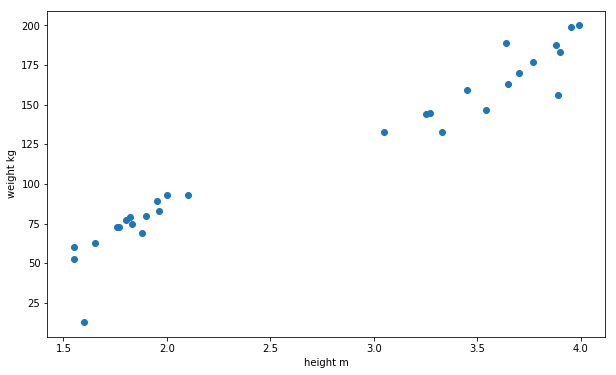

In [3]:
# getting x and y axes
height = df['height_m']
weight = df['weight_kg']

# configuring the figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# label and plot the data
ax.scatter(x=height,y=weight)
plt.xlabel('height m')
plt.ylabel('weight kg')
plt.show()

## Is he/she a monster or a human?
Let's find out if an individual is either a monster or a human by using clustering.

First let's drop the "species" column from the dataframe, because both clustering algorithms we're going to use unsupervised learning algorithms. So we don't want to know the species beforehand.

In [4]:
# dropping the species column
df = df.drop("species", axis=1)
df.head()

,height_m,weight_kg,bodyfat_%
0,1.80,77,12
1,1.90,80,22
2,1.65,63,15
3,2.10,93,19
4,1.76,73,25


### Normalize the data
But as you've probably noticed, the columns change differently between rows.

Let's make sure that the columns that change by large amounts will not be the ruling factor in which cluster an individual is put into.

We'll do this by normalizing the data.

In [5]:
# getting the numerator and denominator
num = df - df.min()
denom = df.max() - df.min()

# using the feature scaling eqution to create a dataframe with normalized variables/features
df_norm = num / denom

df_norm.head()

,height_m,weight_kg,bodyfat_%
0,0.102459,0.342246,0.053763
1,0.143443,0.358289,0.161290
2,0.040984,0.267380,0.086022
3,0.225410,0.427807,0.129032
4,0.086066,0.320856,0.193548


### Hierarchical clustering 
Let's find out which observations belong to which species by using hierarchical clustering!

Note that we know enough about the data to decide at what number of clusters should the algorithm stop merging clusters

In [6]:
# create a hierarchical clustering object using the average linkage criterion and 2 clusters
hier_model = cluster.AgglomerativeClustering(n_clusters=2, linkage='average')

# apply the clustering algorithm which will return an numpy array where each datapoint has been given a cluster index
cluster_indices = hier_model.fit_predict(df_norm)
cluster_indices

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

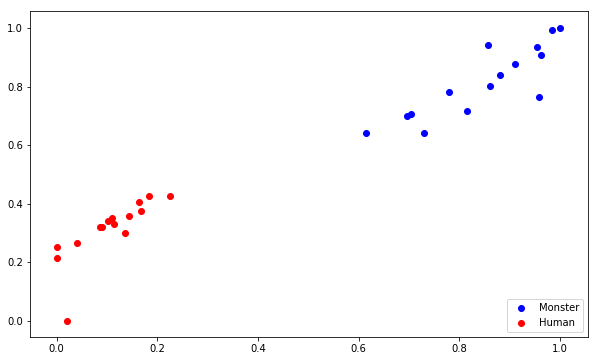

In [7]:
# get numpy array with the dataframes values
df_values = df_norm.values

# configure the figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# plot it with the right indices for each cluster
ax.scatter(df_values[cluster_indices  == 0, 0], df_values[cluster_indices  == 0, 1], c = 'blue', label = 'Monster')
ax.scatter(df_values[cluster_indices  == 1, 0], df_values[cluster_indices  == 1, 1], c = 'red', label = 'Human')
#ax.scatter(df_values[cluster_indices  == 2, 0], df_values[cluster_indices  == 2, 1], c = 'green', label = 'Some other species')

plt.legend(loc='lower right')

plt.show()

### K-Means clustering
Let's find out which observations belong to which species by using k-means clustering!

But instead of hardcoding in the value of *k* (the number of clusters), let's use:
#### The Elbow Method
to find the appropriate value of *k*.

So let's calculate the *SSE* for each *k* in the range, let's say 1-10 sounds like a good number. Plot it and find the elbow in the graph!

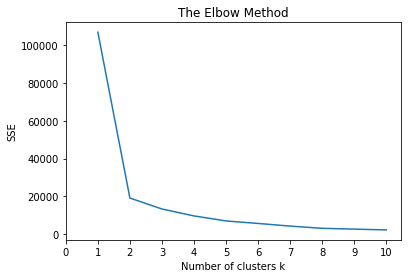

In [8]:
# initlize a list to hold onto each sse
sse = []

# run through each k, get and save each sse
for k in range(1, 11):
    # run through the k-means algorithm using 'k-means++' for smart initalization of centroids to speed up the process
    kmeans = cluster.KMeans(n_clusters = k, init = 'k-means++', max_iter = 50)
    kmeans.fit(df.values)
    # kmeans.inertia_ gives you the sse from the kmeans model
    sse.append(kmeans.inertia_)

# plot it
plt.plot(range(1, 11), sse)
plt.xticks(np.arange(0, 11, 1.0))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters k')
plt.ylabel('SSE') 
plt.show()

# the elbow is clearly visible and 2 clusters is the appropriate value of k
k = 2

### Alright, we found the optimum value of *k*! Let's run the algorithm and plot the results

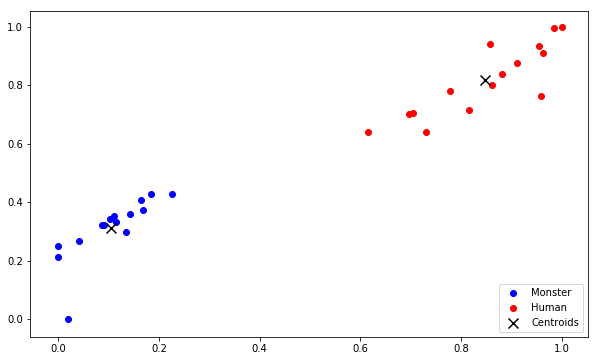

In [9]:
# create a kmeans clustering object using the newly found k
kmeans_model = cluster.KMeans(n_clusters = k)
cluster_indices = kmeans_model.fit_predict(df_norm)

# configure again
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# plot each cluster
ax.scatter(df_values[cluster_indices  == 0, 0], df_values[cluster_indices  == 0, 1], c = 'blue', label = 'Monster')
ax.scatter(df_values[cluster_indices  == 1, 0], df_values[cluster_indices  == 1, 1], c = 'red', label = 'Human')

# plot the cetroids as well
ax.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'black', marker='x', label = 'Centroids')

plt.legend(loc='lower right')

plt.show()